# Problem Statement
- An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.
- The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

### Step 1: Importing Data and Inspecting the Data Frame

In [1]:
#Importing Libraries for data Preparation and EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Model Creation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Model Evauation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

#supressing Warning
import warnings
warnings.filterwarnings('ignore')



In [2]:
# TO see all the available columns
pd.set_option('max_columns',None) #None, for visibility of all the columns

In [3]:
#importing DataSet
df=pd.read_csv('Leads.csv')
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
# Checking data type of each column in the data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
# Checking shape of the dataset- it has 9240 rows and 37 columns
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
df.shape

(9240, 37)

### Step 2: Data Preparation, Cleaning and EDA

In [7]:
# Checking null records in the dataset
round(100*df.isnull().sum(axis=0)/len(df),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# As we can observe that there are select values for many column.
#This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN and now check the missing values percentage.
df=df.replace('Select',np.nan)

In [9]:
# Finding Columns which contains 'Yes' data
l1=set()
for col in df.select_dtypes(include=['object']).columns:
        if('Yes' in df[col].values):
            l1.add(col)
l1

{'A free copy of Mastering The Interview',
 'Digital Advertisement',
 'Do Not Call',
 'Do Not Email',
 'Newspaper',
 'Newspaper Article',
 'Search',
 'Through Recommendations',
 'X Education Forums'}

In [10]:
# Finding Columns which contains 'No' data
l2=set()
for col in df.select_dtypes(include=['object']).columns:
        if('No' in df[col].values):
            l2.add(col)
l2

{'A free copy of Mastering The Interview',
 'Digital Advertisement',
 'Do Not Call',
 'Do Not Email',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Magazine',
 'Newspaper',
 'Newspaper Article',
 'Receive More Updates About Our Courses',
 'Search',
 'Through Recommendations',
 'Update me on Supply Chain Content',
 'X Education Forums'}

In [11]:
#List containing columns which has "yes and no" data
l1=list(l1.union(l2))
l1

['Do Not Email',
 'Update me on Supply Chain Content',
 'X Education Forums',
 'Through Recommendations',
 'Do Not Call',
 'Get updates on DM Content',
 'Newspaper',
 'A free copy of Mastering The Interview',
 'Magazine',
 'Search',
 'Newspaper Article',
 'Receive More Updates About Our Courses',
 'I agree to pay the amount through cheque',
 'Digital Advertisement']

In [12]:
# Replacing all yes and no with 1 and 0 respectively
for i in l1:
    df[i]=df[i].apply(lambda x:1 if x=='Yes' else 0)
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                      NaN                                NaN   
1   India                      NaN                                NaN   
2   India  Business Administration                                NaN   
3   India    Media and Advertising                      Word Of Mouth   
4   India                      NaN                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                        

In [13]:
#Numerical Data
df.select_dtypes(include=['int64','float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
Lead Number                                 9240 non-null int64
Do Not Email                                9240 non-null int64
Do Not Call                                 9240 non-null int64
Converted                                   9240 non-null int64
TotalVisits                                 9103 non-null float64
Total Time Spent on Website                 9240 non-null int64
Page Views Per Visit                        9103 non-null float64
Search                                      9240 non-null int64
Magazine                                    9240 non-null int64
Newspaper Article                           9240 non-null int64
X Education Forums                          9240 non-null int64
Newspaper                                   9240 non-null int64
Digital Advertisement                       9240 non-null int64
Through Recommendations                     9240 non-null

In [14]:
#Categorical Data
df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
Prospect ID                                      9240 non-null object
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 non-null object
How did you hear about X Education               1990 non-null object
What is your current occupation                  6550 non-null object
What matters most to you in choosing a course    6531 non-null object
Tags                                             5887 non-null object
Lead Quality                                     4473 non-null object
Lead Profile                                     2385 non-null object
City                                             5571

### 2.1 Checking duplicates

In [15]:
df.shape[0]

9240

In [16]:
sum(df['Lead Number'].duplicated()==False)

9240

In [17]:
sum(df['Prospect ID'].duplicated()==False)

9240

In [18]:
# As number of rows in df is same as the number of unique rows in 'Lead Number' and 'Prospect ID' columns
# Drop
df.drop(['Lead Number','Prospect ID'],axis=1,inplace=True)

In [19]:
# Dropping all the columns where missing values are more than 45%
df.drop(df.columns[round(100*df.isnull().sum(axis=0)/len(df),2)>45],axis=1,inplace=True)

In [20]:
# Checking missing Percentage in all the columns of the dataframe
round(100*df.isnull().sum(axis=0)/len(df),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [21]:
# Checking country column for missing data
df.Country.value_counts(normalize=True,dropna=False)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
France                   0.064935
Oman                     0.064935
unknown                  0.054113
Canada                   0.043290
Nigeria                  0.043290
Kuwait                   0.043290
South Africa             0.043290
Germany                  0.043290
Sweden                   0.032468
Belgium                  0.021645
China                    0.021645
Asia/Pacific Region      0.021645
Philippines              0.021645
Ghana                    0.021645
Netherlands              0.021645
Italy                    0.021645
Bangladesh               0.021645
Uganda                   0.021645
Kenya         

In [22]:
# As most of the lead comes from India 
df['Country']=df['Country'].replace(np.nan,'India')
df['Country'].value_counts(normalize=True)*100

India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Germany                  0.043290
Canada                   0.043290
Nigeria                  0.043290
Sweden                   0.032468
Belgium                  0.021645
China                    0.021645
Asia/Pacific Region      0.021645
Philippines              0.021645
Ghana                    0.021645
Netherlands              0.021645
Italy                    0.021645
Bangladesh               0.021645
Uganda                   0.021645
Kenya                    0.010823
Vietnam       

In [23]:
# Country Columns is quite disbalanced, its better we drop them other wise model will produce biased result
df.drop('Country',axis=1,inplace=True)

In [24]:
df['Specialization'].value_counts(normalize=True,dropna=False)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [25]:
# As many leads didn't provide specialization its better we assign them as not_specialize
# These leads can be students who were looking for doing some specialization 
df['Specialization']=df['Specialization'].replace(np.nan,'Not_specialized')

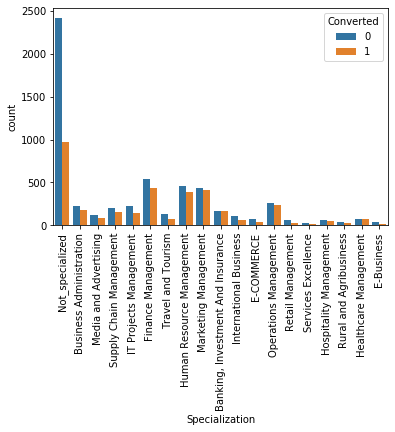

In [26]:
# Plotting countplot of specialization column for checking conversion ratio.
sns.countplot(x='Specialization',hue='Converted',data=df)
plt.xticks(rotation='vertical')
plt.show()

In [27]:
# Producing the list of management specialization
man_list=[]
for j in df['Specialization'].unique():
        if 'Management' in j:
            man_list.append(j)
man_list

['Supply Chain Management',
 'IT Projects Management',
 'Finance Management',
 'Human Resource Management',
 'Marketing Management',
 'Operations Management',
 'Retail Management',
 'Hospitality Management',
 'Healthcare Management']

In [28]:
df['Specialization']=df['Specialization'].replace(man_list,'Managament')

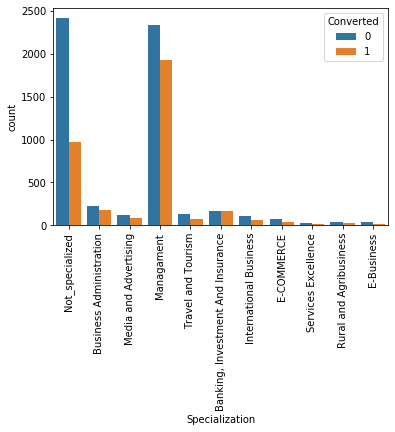

In [29]:
sns.countplot(x='Specialization',hue='Converted',data=df)
plt.xticks(rotation='vertical')
plt.show()

## Inferences
- Most of the leads are either unspecialized or from management specialization.
- Approaching the management specialized leads, will produce more conversion.

In [30]:
df['What is your current occupation'].value_counts(normalize=True,dropna=False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

- As majority people are unempolyed so it is safer to impute missing values with unemployed.

In [31]:
#Imputing the missing value(~29%) with mode data i.e Unemployed
df['What is your current occupation'].replace(np.nan,'Unemployed',inplace=True)

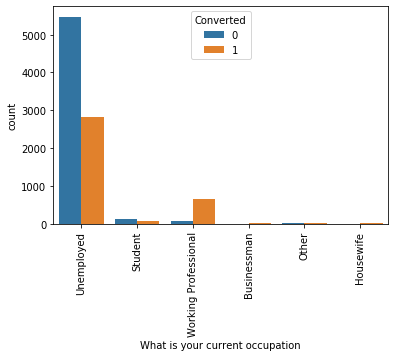

In [32]:
# Plotting countplot for 'What is your current occupation' column
sns.countplot(x='What is your current occupation',hue='Converted',data=df)
plt.xticks(rotation='vertical')
plt.show()

## Inferences
- Working Professionls have high chance of taking the course.
- Unemployed leads(can be students) are very high. If this portion handled properly, we can get more conversion rate.

In [33]:
df['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [34]:
# Imputing missing value with Better Career Prospects(mode)
df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects',inplace=True)

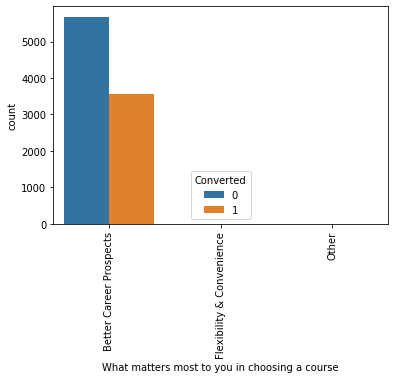

In [35]:
# Plotting countplot of 'What matters most to you in choosing a course' column 
sns.countplot(x='What matters most to you in choosing a course',hue='Converted',data=df)
plt.xticks(rotation='vertical')
plt.show()

## Inference
- Leads looking for better career prospects are more likely to get converted

In [36]:
df['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)*100

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [37]:
# Quite Disbalance data, its better we drop this column for good model building
df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [38]:
#Checking missing percentage in the columns
round(100*df.isnull().sum(axis=0)/len(df),2)

Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00
Tags                                        36.29


In [39]:
# Checking missing data in Tags column 
df['Tags'].value_counts(normalize=True,dropna=False)*100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

In [40]:
# Imputing missing data as Unspecified
df['Tags'].replace(np.nan,'Unspecified',inplace=True)

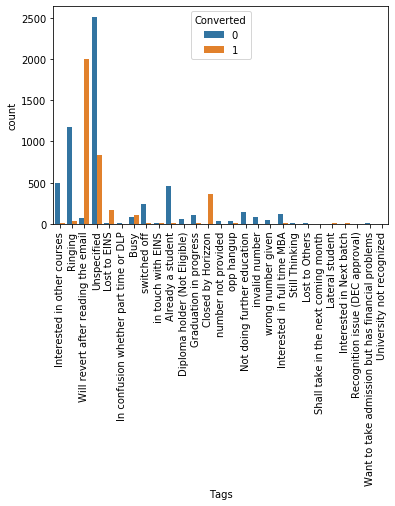

In [41]:
# Countplot of Tags column
sns.countplot(x='Tags',hue='Converted',data=df)
plt.xticks(rotation='vertical')
plt.show()

In [42]:
# Finding tags whose percentage is less than 4
x=df['Tags'].value_counts(normalize=True,dropna=False)*100<4
x=list(x[x==True].index)
x

['Closed by Horizzon',
 'switched off',
 'Busy',
 'Lost to EINS',
 'Not doing further education',
 'Interested  in full time MBA',
 'Graduation in progress',
 'invalid number',
 'Diploma holder (Not Eligible)',
 'wrong number given',
 'opp hangup',
 'number not provided',
 'in touch with EINS',
 'Lost to Others',
 'Still Thinking',
 'Want to take admission but has financial problems',
 'In confusion whether part time or DLP',
 'Interested in Next batch',
 'Lateral student',
 'Shall take in the next coming month',
 'University not recognized',
 'Recognition issue (DEC approval)']

In [43]:
# Categorizing the tags with less percentage as Others
df.Tags.replace(x,'Others',inplace=True)
df.Tags.unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Unspecified', 'Others',
       'Already a student'], dtype=object)

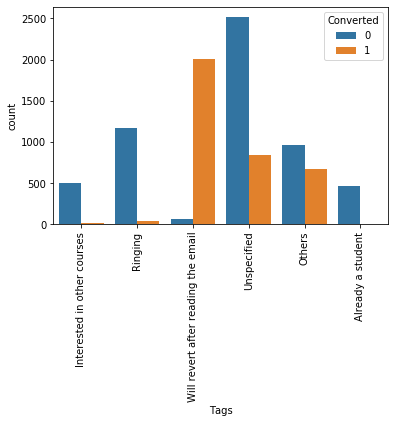

In [44]:
# plotting Countplot of Tags column
sns.countplot(x='Tags',hue='Converted',data=df)
plt.xticks(rotation='vertical')
plt.show()

In [45]:
# Checking distribution of data in Tags column
df['Tags'].value_counts(normalize=True,dropna=False)*100

Unspecified                            36.287879
Will revert after reading the email    22.424242
Others                                 17.683983
Ringing                                13.019481
Interested in other courses             5.551948
Already a student                       5.032468
Name: Tags, dtype: float64

## Inference
- Almost all the leads given tag 'Will revert after reading the email' gets converted 

In [46]:
df['City'].value_counts(normalize=True,dropna=False)*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [47]:
# As most of the conversion leads are from Maharastras and that too from Mumbai
# Its better we impute the missing values with Mumbai instead of catagorizing into separate category (Which can mislead the data)
df.City.replace(np.nan,'Mumbai',inplace=True)

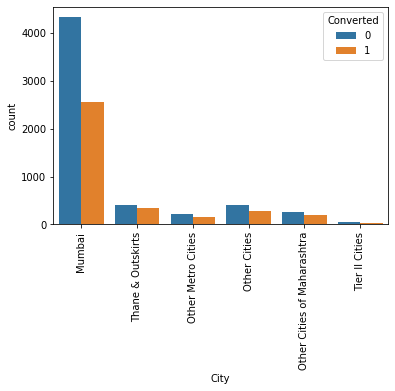

In [48]:
sns.countplot(x='City',hue='Converted',data=df)
plt.xticks(rotation='vertical')
plt.show()

In [49]:
df['City'].value_counts(normalize=True,dropna=False)*100

Mumbai                         74.577922
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

### Inference 
- Most of the leads and converted leads are from Mumbai

In [50]:
#Checking Missing percentage in the columns
round(100*df.isnull().sum(axis=0)/len(df),2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

#### Now we have very less percentage(<2%) of missing values, its better we remove them.

In [51]:
#Dropping missing values with less percentage
df.dropna(inplace=True) # droping rows with at least one element is missing

In [52]:
round(100*df.isnull().sum(axis=0)/len(df),2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

In [53]:
df.shape

(9074, 26)

In [54]:
df['Converted'].value_counts(normalize=True,dropna=False)*100

0    62.144589
1    37.855411
Name: Converted, dtype: float64

In [55]:
#Categorical Data
df.select_dtypes(include='object').columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [56]:
df['Lead Source'].value_counts(normalize=True)*100

Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Social Media          0.022041
Press_Release         0.022041
Live Chat             0.022041
WeLearn               0.011020
NC_EDM                0.011020
testone               0.011020
Pay per Click Ads     0.011020
blog                  0.011020
youtubechannel        0.011020
welearnblog_Home      0.011020
Name: Lead Source, dtype: float64

In [57]:
df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'google', 'Welingak Website',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],
      dtype=object)

In [58]:
# Finding Lead Source whose percentage is less than 5
x=df['Lead Source'].value_counts(normalize=True,dropna=False)*100<5
x=list(x[x==True].index)
x

['Reference',
 'Welingak Website',
 'Referral Sites',
 'Facebook',
 'bing',
 'google',
 'Click2call',
 'Social Media',
 'Press_Release',
 'Live Chat',
 'WeLearn',
 'NC_EDM',
 'testone',
 'Pay per Click Ads',
 'blog',
 'youtubechannel',
 'welearnblog_Home']

In [59]:
df['Lead Source'].replace(x,'Other Sources',inplace=True)

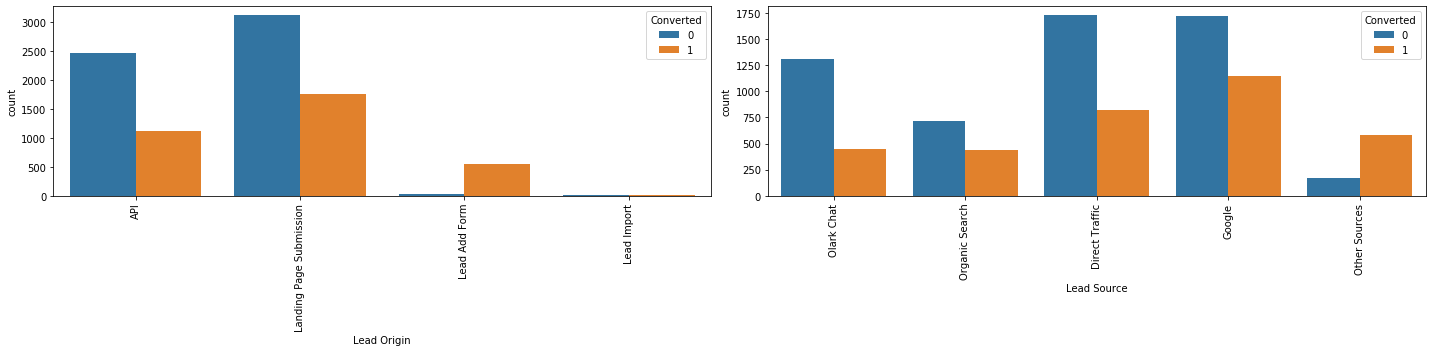

In [60]:
'''plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Source',hue='Converted',data=df)
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
sns.countplot(x='Lead Origin',hue='Converted',data=df)
plt.xticks(rotation='vertical')
plt.show()'''
plt.figure(figsize=([20,5]))
for i,f in enumerate(['Lead Origin','Lead Source']):
    
    plt.subplot(1,2,i+1)
    sns.countplot(x=f,hue='Converted',data=df)
    plt.xticks(rotation='vertical')
    plt.tight_layout()
plt.show()

## Inferences from Lead Origin and Lead Source Plot
- The conversion rate of 'Lead add form' is very high.
- API and Landing Page Submission brings higher number of leads and many are getting converted.
- Other sources though produce less leads but their conversion rate is high
- Direct Traffic and Google are the good source of leads as well their conversion rate is also quite decent.

In [61]:
df['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Received                   0.022041
Email Marked Spam                0.022041
Resubscribed to emails           0.011020
Visited Booth in Tradeshow       0.011020
Name: Last Activity, dtype: float64

In [62]:
x=(df['Last Activity'].value_counts(normalize=True)*100<3)
others=list(x[x==True].index)
others

['Email Link Clicked',
 'Form Submitted on Website',
 'Unreachable',
 'Unsubscribed',
 'Had a Phone Conversation',
 'View in browser link Clicked',
 'Approached upfront',
 'Email Received',
 'Email Marked Spam',
 'Resubscribed to emails',
 'Visited Booth in Tradeshow']

In [63]:
df['Last Activity'].replace(others,'others',inplace=True)

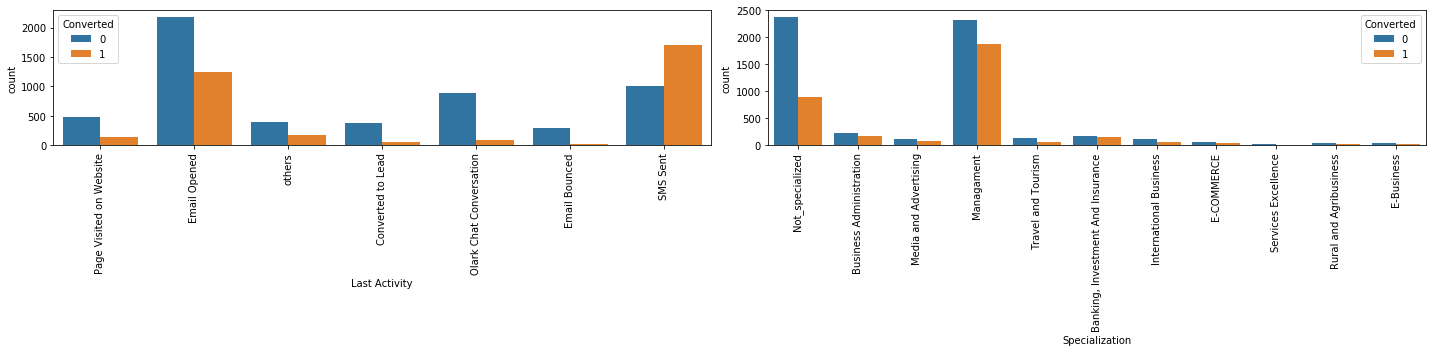

In [64]:
plt.figure(figsize=([20,5]))
for i,f in enumerate(['Last Activity', 'Specialization']):
    
    plt.subplot(1,2,i+1)
    sns.countplot(x=f,hue='Converted',data=df)
    plt.xticks(rotation='vertical')
    plt.tight_layout()
plt.show()

## Inferences

#### Last activity
- Lot of leads last activity status were "Email opened" and "Sms Sent". They were also more likely to get converted
- The conversion rate from the 'sms sent' is quite high.
#### Specialization

- Most of the leads are either unspecialized or from management specialization.
- Approaching the management specialized people will produce more conversion.

In [65]:
df['Last Notable Activity'].value_counts(normalize=True)*100

Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
View in browser link Clicked     0.011020
Form Submitted on Website        0.011020
Resubscribed to emails           0.011020
Approached upfront               0.011020
Email Received                   0.011020
Name: Last Notable Activity, dtype: float64

In [66]:
x=df['Last Notable Activity'].value_counts(normalize=True)*100<3
others=list(x[x==True].index)

In [67]:
df['Last Notable Activity'].replace(others,'others',inplace=True)

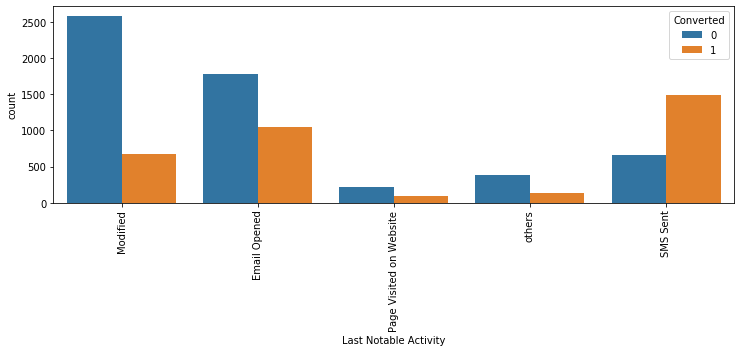

In [68]:
plt.figure(figsize=([20,5]))
for i,f in enumerate(['Last Notable Activity']):
    
    plt.subplot(1,2,i+1)
    sns.countplot(x=f,hue='Converted',data=df)
    plt.xticks(rotation='vertical')
    plt.tight_layout()
plt.show()

## Inference
- Lot of leads last notable activity status were "Email opened" and "Sms Sent". They were also more likely to get converted
- SMS sent last notable activity conversion rate is high
- Lead with Modified last notable activity is quite high but their conversion rate is poor.

#### Checking numerical columns

In [69]:
# Columns containing yes and no data only
l1

['Do Not Email',
 'Update me on Supply Chain Content',
 'X Education Forums',
 'Through Recommendations',
 'Do Not Call',
 'Get updates on DM Content',
 'Newspaper',
 'A free copy of Mastering The Interview',
 'Magazine',
 'Search',
 'Newspaper Article',
 'Receive More Updates About Our Courses',
 'I agree to pay the amount through cheque',
 'Digital Advertisement']

In [70]:
# Cheking distribution of data in the list l1 which contains data(Yes(1) and No(2))
for i in l1:
    print(df[i].value_counts(normalize=True,dropna=False)*100)
    print('-------------------------------------------------------')

0    92.109323
1     7.890677
Name: Do Not Email, dtype: float64
-------------------------------------------------------
0    100.0
Name: Update me on Supply Chain Content, dtype: float64
-------------------------------------------------------
0    99.98898
1     0.01102
Name: X Education Forums, dtype: float64
-------------------------------------------------------
0    99.922857
1     0.077143
Name: Through Recommendations, dtype: float64
-------------------------------------------------------
0    99.977959
1     0.022041
Name: Do Not Call, dtype: float64
-------------------------------------------------------
0    100.0
Name: Get updates on DM Content, dtype: float64
-------------------------------------------------------
0    99.98898
1     0.01102
Name: Newspaper, dtype: float64
-------------------------------------------------------
0    68.172801
1    31.827199
Name: A free copy of Mastering The Interview, dtype: float64
-------------------------------------------------------
0

In [71]:
# Dropping highly unbalance Columns:
m=[]
for i in l1:
    if i not in ['Do Not Email','A free copy of Mastering The Interview']:
        m.append(i)
df.drop(m,axis=1,inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
Lead Origin                               9074 non-null object
Lead Source                               9074 non-null object
Do Not Email                              9074 non-null int64
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total Time Spent on Website               9074 non-null int64
Page Views Per Visit                      9074 non-null float64
Last Activity                             9074 non-null object
Specialization                            9074 non-null object
What is your current occupation           9074 non-null object
Tags                                      9074 non-null object
City                                      9074 non-null object
A free copy of Mastering The Interview    9074 non-null int64
Last Notable Activity                     9074 non-null object
dtypes: float

### 2.2 Checking Outliers

In [73]:
df[df.select_dtypes(include=['int64','float64']).columns]

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0                0          0          0.0                            0   
1                0          0          5.0                          674   
2                0          1          2.0                         1532   
3                0          0          1.0                          305   
4                0          1          2.0                         1428   
...            ...        ...          ...                          ...   
9235             1          1          8.0                         1845   
9236             0          0          2.0                          238   
9237             1          0          2.0                          199   
9238             0          1          3.0                          499   
9239             0          1          6.0                         1279   

      Page Views Per Visit  A free copy of Mastering The Interview  
0                     0.00                                       0  
1                     2.50                                       0  
2                     2.00                                       1  
3                     1.00                                       0  
4                     1.00                                       0  
...                    ...                                     ...  
9235                  2.67                                       0  
9236                  2.00                                       1  
9237                  2.00                                       1  
9238                  3.00                                       0  
9239                  3.00                                       1  

[9074 rows x 6 columns]

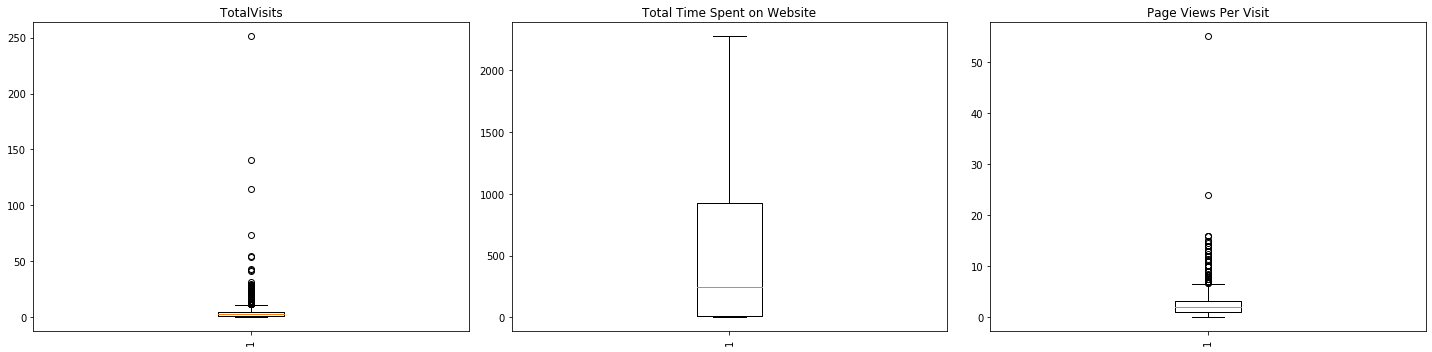

In [74]:
plt.figure(figsize=([20,5]))
for i,f in enumerate(['TotalVisits','Total Time Spent on Website','Page Views Per Visit']):
    plt.subplot(1,3,i+1)
    plt.title(f)
    plt.boxplot(df[f])
    plt.xticks(rotation='vertical')
    plt.tight_layout()
plt.show()

## Inferences:
- There are outliers presence in 'TotalVisits' and 'Page Views Per Visit' columns

In [75]:
df[['TotalVisits','Page Views Per Visit']].describe(percentiles=[0.1,0.99])

TotalVisits  Page Views Per Visit
count  9074.000000           9074.000000
mean      3.456028              2.370151
std       4.858802              2.160871
min       0.000000              0.000000
10%       0.000000              0.000000
50%       3.000000              2.000000
99%      17.000000              9.000000
max     251.000000             55.000000

In [76]:
# Removing outliers above 99% 
df['TotalVisits']=np.where(df['TotalVisits']>17,17,df['TotalVisits'])
df['Page Views Per Visit']=np.where(df['Page Views Per Visit']>9,9,df['Page Views Per Visit'])

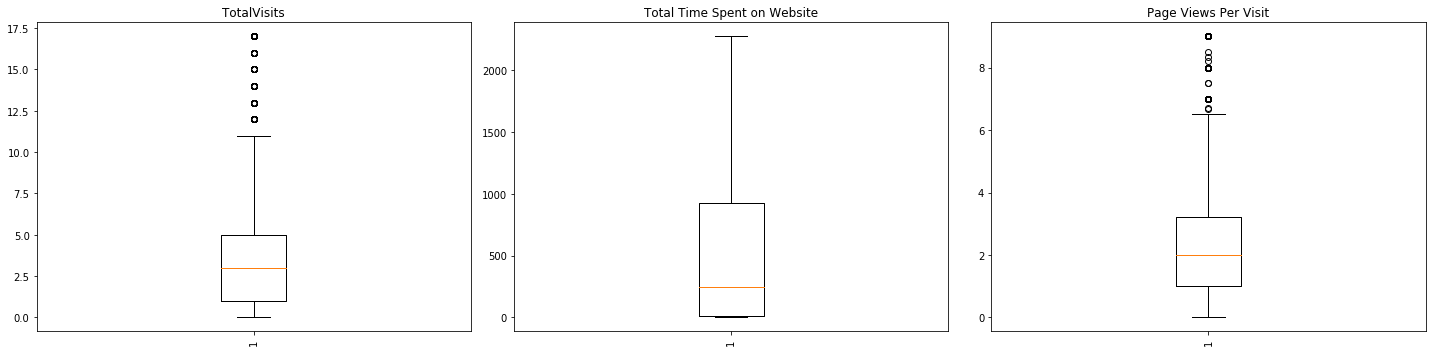

In [77]:
plt.figure(figsize=([20,5]))
for i,f in enumerate(['TotalVisits','Total Time Spent on Website','Page Views Per Visit']):
    plt.subplot(1,3,i+1)
    plt.title(f)
    plt.boxplot(df[f])
    plt.xticks(rotation='vertical')
    plt.tight_layout()
plt.show()

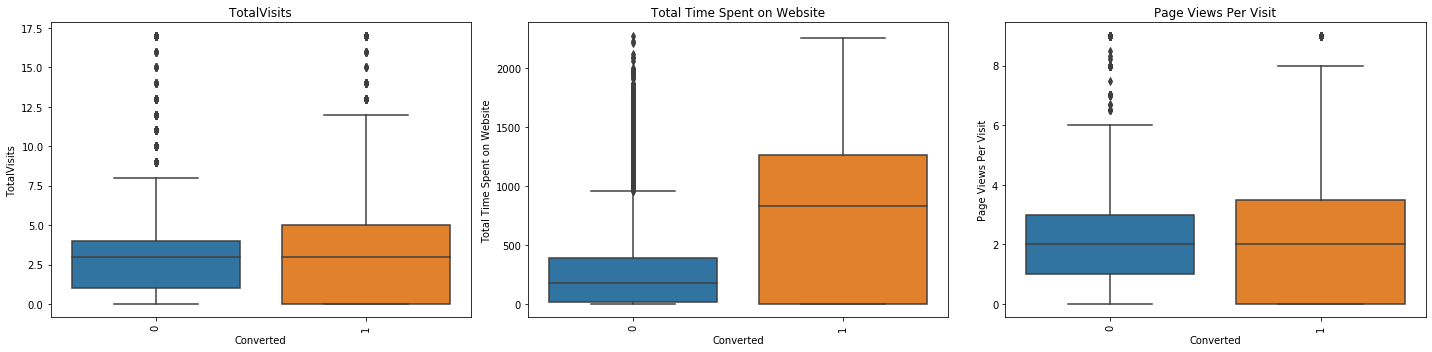

In [78]:
plt.figure(figsize=([20,5]))
for i,f in enumerate(['TotalVisits','Total Time Spent on Website','Page Views Per Visit']):
    plt.subplot(1,3,i+1)
    plt.title(f)
    sns.boxplot(x='Converted',y=f,data=df)
    plt.xticks(rotation='vertical')
    plt.tight_layout()
plt.show()

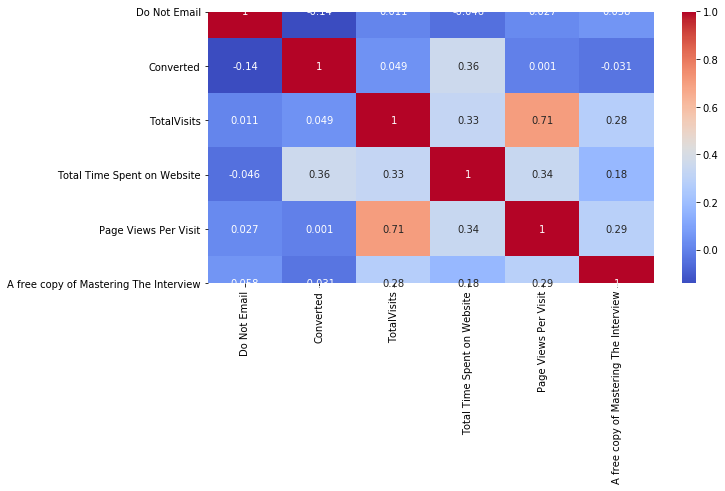

In [79]:
# Let's see the correlation matrix 
plt.figure(figsize = (10,5))        # Size of the figure
sns.heatmap(df.corr(),cmap='coolwarm',annot = True)
plt.show()

<Figure size 720x1440 with 0 Axes>

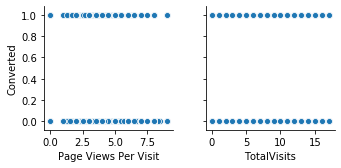

In [80]:
plt.figure(figsize=(10,20))
#sns.scatterplot(x='Page Views Per Visit',y='TotalVisits',data=df)
sns.pairplot(df, x_vars=['Page Views Per Visit','TotalVisits'],y_vars='Converted',kind='scatter',diag_kind=None)
plt.show()

### Inference 
- Though the correlation between 'Page Views Per Visit' and 'TotalVisits' is 0.71, their graph giving the different notion. 
- we cannot drop these columns now.

In [81]:
df[df.select_dtypes(include=['object']).columns]

Lead Origin     Lead Source            Last Activity  \
0                         API      Olark Chat  Page Visited on Website   
1                         API  Organic Search             Email Opened   
2     Landing Page Submission  Direct Traffic             Email Opened   
3     Landing Page Submission  Direct Traffic                   others   
4     Landing Page Submission          Google        Converted to Lead   
...                       ...             ...                      ...   
9235  Landing Page Submission  Direct Traffic                   others   
9236  Landing Page Submission  Direct Traffic                 SMS Sent   
9237  Landing Page Submission  Direct Traffic                 SMS Sent   
9238  Landing Page Submission          Google                 SMS Sent   
9239  Landing Page Submission  Direct Traffic                 SMS Sent   

               Specialization What is your current occupation  \
0             Not_specialized                      Unemployed   
1             Not_specialized                      Unemployed   
2     Business Administration                         Student   
3       Media and Advertising                      Unemployed   
4             Not_specialized                      Unemployed   
...                       ...                             ...   
9235               Managament                      Unemployed   
9236    Media and Advertising                      Unemployed   
9237  Business Administration                      Unemployed   
9238               Managament                      Unemployed   
9239               Managament                      Unemployed   

                                     Tags                City  \
0             Interested in other courses              Mumbai   
1                                 Ringing              Mumbai   
2     Will revert after reading the email              Mumbai   
3                                 Ringing              Mumbai   
4     Will revert after reading the email              Mumbai   
...                                   ...                 ...   
9235  Will revert after reading the email              Mumbai   
9236                               Others              Mumbai   
9237                               Others              Mumbai   
9238                          Unspecified  Other Metro Cities   
9239  Will revert after reading the email        Other Cities   

     Last Notable Activity  
0                 Modified  
1             Email Opened  
2             Email Opened  
3                 Modified  
4                 Modified  
...                    ...  
9235                others  
9236              SMS Sent  
9237              SMS Sent  
9238              SMS Sent  
9239              Modified  

[9074 rows x 8 columns]

In [82]:
df['Lead Origin'].value_counts(normalize=True) *100

Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: Lead Origin, dtype: float64

In [83]:
# Dropping sales data
m1=['Tags','Last Activity','Last Notable Activity']
df.drop(m1,axis=1,inplace=True)

In [84]:
df.select_dtypes(include='object').columns

Index(['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'City'],
      dtype='object')

### Step 3: Creating dummy variables

In [85]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'Lead Orgin'
m1 = pd.get_dummies(df['Lead Origin'],prefix='Lead Origin')
m1 = m1.drop(['Lead Origin_Lead Import'], 1)
df = pd.concat([df,m1],axis=1)

# Creating dummy variables for the variable 'Lead Source'
m1 = pd.get_dummies(df['Lead Source'],prefix='Lead Source')
m1 = m1.drop(['Lead Source_Other Sources'], 1)
df = pd.concat([df,m1],axis=1)

'''# Creating dummy variables for the variable 'Last Activity'
m1 = pd.get_dummies(df['Last Activity'],prefix='Last Activity')
m1 = m1.drop(['Last Activity_others'], 1)
df = pd.concat([df,m1],axis=1)'''


"# Creating dummy variables for the variable 'Last Activity'\nm1 = pd.get_dummies(df['Last Activity'],prefix='Last Activity')\nm1 = m1.drop(['Last Activity_others'], 1)\ndf = pd.concat([df,m1],axis=1)"

In [86]:
df['Specialization'].value_counts(normalize=True) *100

Managament                           46.253031
Not_specialized                      36.169275
Business Administration               4.397179
Banking, Investment And Insurance     3.691867
Media and Advertising                 2.226141
Travel and Tourism                    2.226141
International Business                1.939608
E-COMMERCE                            1.223275
Rural and Agribusiness                0.804496
E-Business                            0.628168
Services Excellence                   0.440820
Name: Specialization, dtype: float64

In [87]:
x=df['Specialization'].value_counts(normalize=True) *100<5
m=list(x[x==True].index)
df['Specialization'].replace(m,'others',inplace=True)
df['Specialization'].value_counts(normalize=True) *100

Managament         46.253031
Not_specialized    36.169275
others             17.577695
Name: Specialization, dtype: float64

In [88]:
# Creating dummy variables for the variable 'Specialization'
m1 = pd.get_dummies(df['Specialization'],prefix='Specialization')
m1 = m1.drop(['Specialization_others'], 1)
df = pd.concat([df,m1],axis=1)

# Creating dummy variables for the variable 'What is your current occupation'
m1 = pd.get_dummies(df['What is your current occupation'],prefix='What is your current occupation')
m1 = m1.drop(['What is your current occupation_Other'], 1)
df = pd.concat([df,m1],axis=1)

'''# Creating dummy variables for the variable 'Tags'
m1 = pd.get_dummies(df['Tags'],prefix='Tags')
m1 = m1.drop(['Tags_Others'], 1)
df = pd.concat([df,m1],axis=1)'''

# Creating dummy variables for the variable 'City'
m1 = pd.get_dummies(df['City'],prefix='City')
m1 = m1.drop(['City_Tier II Cities'], 1)
df = pd.concat([df,m1],axis=1)

'''# Creating dummy variables for the variable 'Last Notable Activity'
m1 = pd.get_dummies(df['Last Notable Activity'],prefix='Last Notable Activity')
m1 = m1.drop(['Last Notable Activity_others'], 1)
df = pd.concat([df,m1],axis=1)'''
df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

    Specialization What is your current occupation    City  \
0  Not_specialized                      Unemployed  Mumbai   
1  Not_specialized                      Unemployed  Mumbai   
2           others                         Student  Mumbai   
3           others                      Unemployed  Mumbai   
4  Not_specialized                      Unemployed  Mumbai   

   A free copy of Mastering The Interview  Lead Origin_API  \
0                                       0                1   
1                                       0                1   
2                                       1                0   
3                                       0                0   
4                                       0                0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Source_Direct Traffic  Lead Source_Google  Lead Source_Olark Chat  \
0                           0                   0                       1   
1                           0                   0                       0   
2                           1                   0                       0   
3                           1                   0                       0   
4                           0                   1                       0   

   Lead Source_Organic Search  Specialization_Managament  \
0                           0                          0   
1                           1                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   Specialization_Not_specialized  \
0                               1   
1                               1   
2                               0   
3                               0   
4                               1   

   What is your current occupation_Businessman  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   What is your current occupation_Housewife  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   What is your current occupation_Student  \
0                                        0   
1                                        0   
2                                        1   
3                                        0   
4                                        0   

   What is your current occupation_Unemployed  \
0                                           1   


In [89]:
dr=list(df.select_dtypes(include='object').columns)
dr

['Lead Origin',
 'Lead Source',
 'Specialization',
 'What is your current occupation',
 'City']

In [90]:
df.drop(dr,axis=1,inplace=True)


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 25 columns):
Do Not Email                                            9074 non-null int64
Converted                                               9074 non-null int64
TotalVisits                                             9074 non-null float64
Total Time Spent on Website                             9074 non-null int64
Page Views Per Visit                                    9074 non-null float64
A free copy of Mastering The Interview                  9074 non-null int64
Lead Origin_API                                         9074 non-null uint8
Lead Origin_Landing Page Submission                     9074 non-null uint8
Lead Origin_Lead Add Form                               9074 non-null uint8
Lead Source_Direct Traffic                              9074 non-null uint8
Lead Source_Google                                      9074 non-null uint8
Lead Source_Olark Chat                               

### Step 4: Test-Train Split

In [92]:
# Putting response vaiable to y
y=df.Converted
# Putting feature variable to X

X = df.drop(['Converted'], axis=1)

X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_API  Lead Origin_Landing Page Submission  \
0                1                                    0   
1                1                                    0   
2                0                                    1   
3                0                                    1   
4                0                                    1   

   Lead Origin_Lead Add Form  Lead Source_Direct Traffic  Lead Source_Google  \
0                          0                           0                   0   
1                          0                           0                   0   
2                          0                           1                   0   
3                          0                           1                   0   
4                          0                           0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Specialization_Managament  Specialization_Not_specialized  \
0                          0                               1   
1                          0                               1   
2                          0                               0   
3                          0                               0   
4                          0                               1   

   What is your current occupation_Businessman  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   What is your current occupation_Housewife  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   What is your current occupation_Student  \
0                                        0   
1                                        0   
2                                        1   
3                                        0   
4                                        0   

   What is your current occupation_Unemployed  \
0                                           1   
1                                           1   
2                                           0   
3                                           1   
4                                           1   

   What is your current occupation_Working Professional  City_Mumbai  \
0                                                  0               1   
1                                                  0               1   
2                                                  0               1   
3                                                  0               1   
4                                                  0               1   

   City_Other Cities  City_Other Cities of Maharashtra  \
0               

In [93]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [94]:
#scaling numeric columns
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
3009     -0.292645    -0.417238                    -0.160255   
1012      3.417111    -0.417238                    -0.540048   
9226     -0.292645    -1.034493                    -0.888650   
4750     -0.292645    -0.417238                     1.643304   
7987     -0.292645     0.508645                     2.017593   

      Page Views Per Visit  A free copy of Mastering The Interview  \
3009             -0.177298                                1.473344   
1012             -0.177298                               -0.678728   
9226             -1.183128                               -0.678728   
4750             -0.177298                               -0.678728   
7987              0.074159                               -0.678728   

      Lead Origin_API  Lead Origin_Landing Page Submission  \
3009                0                                    1   
1012                0                                    1   
9226                1                                    0   
4750                0                                    1   
7987                0                                    1   

      Lead Origin_Lead Add Form  Lead Source_Direct Traffic  \
3009                          0                           1   
1012                          0                           1   
9226                          0                           0   
4750                          0                           1   
7987                          0                           1   

      Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
3009                   0                       0                           0   
1012                   0                       0                           0   
9226                   0                       1                           0   
4750                   0                       0                           0   
7987                   0                       0                           0   

      Specialization_Managament  Specialization_Not_specialized  \
3009                          1                               0   
1012                          0                               1   
9226                          0                               1   
4750                          1                               0   
7987                          1                               0   

      What is your current occupation_Businessman  \
3009                                            0   
1012                                            0   
9226                                            0   
4750                                            0   
7987                                            0   

      What is your current occupation_Housewife  \
3009                                          0   
1012                                          0   
9226                                          0   
4750                                          0   
7987                                          0   

      What is your current occupation_Student  \
3009                                        0   
1012                                        0   
9226                                        0   
4750                                        0   
7987                                        0   

      What is your current occupation_Unemployed  \
3009                                           1   
1012                                           0   
9226                                           1   
4750                                           1   
7987                                           1   

      What is your current occupation_Working Professional  City_Mumbai  \
3009                                                  0               1   
1012                                                  1               1   
9226                                                  0               1   
4750                          

In [95]:
### Checking the Conversion Rate
conversion= (sum(df['Converted'])/len(df['Converted'].index))*100
conversion

37.85541106458012

- we have 37.85% conversion rate

### Step 6: Model Building

In [96]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [97]:
rfe.support_

array([ True, False,  True, False, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False])

In [98]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('A free copy of Mastering The Interview', False, 7),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Direct Traffic', False, 8),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 4),
 ('Specialization_Managament', False, 10),
 ('Specialization_Not_specialized', True, 1),
 ('What is your current occupation_Businessman', False, 9),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Mumbai', True, 1),
 ('City_Other Cities', True, 1),
 ('City_Other Cities of Maharashtra', True, 1),
 ('City_Other Metro Cities', Tru

In [99]:
col = X_train.columns[rfe.support_]

In [100]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Specialization_Managament',
       'What is your current occupation_Businessman',
       'City_Thane & Outskirts'],
      dtype='object')

In [101]:
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Specialization_Not_specialized',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'City_Mumbai',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities'],
      dtype='object')

##### 6.1 Assessing the model with StatsModels

In [102]:
# Building Logistic Model 1
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2954.3
Date:                Mon, 14 Jun 2021   Deviance:                       5908.5
Time:                        22:12:26   Pearson chi2:                 7.44e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9960      0.770      1.293      0.196      -0.513       2.505
Do Not Email                                            -0.3932      0.043     -9.117      0.000      -0.478      -0.309
Total Time Spent on Website                              1.1098      0.038     29.067      0.000       1.035       1.185
Lead Origin_API                                         -0.8475      0.476     -1.782      0.075      -1.780       0.085
Lead Origin_Landing Page Submission                     -1.7613      0.472     -3.734      0.000      -2.686      -0.837
Lead Origin_Lead Add Form                                3.4095      0.509      6.692      0.000       2.411       4.408
Lead Source_Olark Chat                                   0.8575      0.112      7.667      0.000       0.638       1.077
Specialization_Not_specialized                          -1.1313      0.120     -9.425      0.000      -1.367      -0.896
What is your current occupation_Housewife               21.9661   1.49e+04      0.001      0.999   -2.92e+04    2.92e+04
What is your current occupation_Student                 -0.2536      0.638     -0.397      0.691      -1.504       0.997
What is your current occupation_Unemployed              -0.4730      0.604     -0.784      0.433      -1.656       0.710
What is your current occupation_Working Professional     2.1701      0.629      3.448      0.001       0.937       3.403
City_Mumbai                                              0.0872      0.121      0.722      0.470      -0.150       0.324
City_Other Cities                                        0.1004      0.160      0.628      0.530      -0.213       0.414
City_Other Cities of Maharashtra                         0.2113      0.181      1.165      0.244      -0.144       0.567
City_Other Metro Cities                                  0.2074      0.189      1.096      0.273      -0.164       0.578
========================================================================================================================
"""

In [103]:
 # Dropping "What is your current occupation_Housewife" as its p-value is greater than 0.05
col=col.drop('What is your current occupation_Housewife',1)

In [104]:
# Building Logistic Model 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2956.5
Date:                Mon, 14 Jun 2021   Deviance:                       5913.1
Time:                        22:12:27   Pearson chi2:                 7.45e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4775      0.740      1.997      0.046       0.028       2.928
Do Not Email                                            -0.3940      0.043     -9.128      0.000      -0.479      -0.309
Total Time Spent on Website                              1.1086      0.038     29.057      0.000       1.034       1.183
Lead Origin_API                                         -0.8498      0.476     -1.787      0.074      -1.782       0.082
Lead Origin_Landing Page Submission                     -1.7581      0.472     -3.727      0.000      -2.683      -0.834
Lead Origin_Lead Add Form                                3.4099      0.509      6.694      0.000       2.411       4.408
Lead Source_Olark Chat                                   0.8578      0.112      7.670      0.000       0.639       1.077
Specialization_Not_specialized                          -1.1296      0.120     -9.418      0.000      -1.365      -0.895
What is your current occupation_Student                 -0.7376      0.600     -1.229      0.219      -1.914       0.439
What is your current occupation_Unemployed              -0.9566      0.564     -1.697      0.090      -2.061       0.148
What is your current occupation_Working Professional     1.6860      0.591      2.853      0.004       0.528       2.844
City_Mumbai                                              0.0884      0.121      0.732      0.464      -0.148       0.325
City_Other Cities                                        0.0974      0.160      0.610      0.542      -0.216       0.411
City_Other Cities of Maharashtra                         0.2111      0.181      1.164      0.244      -0.144       0.566
City_Other Metro Cities                                  0.2071      0.189      1.094      0.274      -0.164       0.578
========================================================================================================================
"""

In [105]:
# Dropping column with high p-value one by one 
col=col.drop('City_Other Cities',1)

In [106]:
# Building Logistic Model 3
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2956.7
Date:                Mon, 14 Jun 2021   Deviance:                       5913.4
Time:                        22:12:27   Pearson chi2:                 7.42e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.5327      0.735      2.087      0.037       0.093       2.972
Do Not Email                                            -0.3935      0.043     -9.120      0.000      -0.478      -0.309
Total Time Spent on Website                              1.1083      0.038     29.052      0.000       1.033       1.183
Lead Origin_API                                         -0.8512      0.476     -1.788      0.074      -1.784       0.082
Lead Origin_Landing Page Submission                     -1.7590      0.472     -3.726      0.000      -2.684      -0.834
Lead Origin_Lead Add Form                                3.4057      0.510      6.681      0.000       2.407       4.405
Lead Source_Olark Chat                                   0.8586      0.112      7.679      0.000       0.639       1.078
Specialization_Not_specialized                          -1.1295      0.120     -9.415      0.000      -1.365      -0.894
What is your current occupation_Student                 -0.7447      0.600     -1.240      0.215      -1.921       0.432
What is your current occupation_Unemployed              -0.9648      0.564     -1.712      0.087      -2.069       0.140
What is your current occupation_Working Professional     1.6793      0.591      2.842      0.004       0.521       2.837
City_Mumbai                                              0.0425      0.094      0.451      0.652      -0.142       0.227
City_Other Cities of Maharashtra                         0.1652      0.165      1.002      0.316      -0.158       0.488
City_Other Metro Cities                                  0.1610      0.173      0.929      0.353      -0.179       0.501
========================================================================================================================
"""

In [107]:
# Dropping column with high p-value one by one 
col=col.drop('City_Other Cities of Maharashtra',1)

In [108]:
# Building Logistic Model 4
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2957.2
Date:                Mon, 14 Jun 2021   Deviance:                       5914.4
Time:                        22:12:28   Pearson chi2:                 7.43e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.5980      0.731      2.185      0.029       0.165       3.031
Do Not Email                                            -0.3943      0.043     -9.138      0.000      -0.479      -0.310
Total Time Spent on Website                              1.1089      0.038     29.077      0.000       1.034       1.184
Lead Origin_API                                         -0.8868      0.474     -1.870      0.062      -1.816       0.043
Lead Origin_Landing Page Submission                     -1.7912      0.471     -3.806      0.000      -2.714      -0.869
Lead Origin_Lead Add Form                                3.3711      0.508      6.633      0.000       2.375       4.367
Lead Source_Olark Chat                                   0.8586      0.112      7.678      0.000       0.639       1.078
Specialization_Not_specialized                          -1.1263      0.120     -9.392      0.000      -1.361      -0.891
What is your current occupation_Student                 -0.7390      0.600     -1.231      0.218      -1.916       0.437
What is your current occupation_Unemployed              -0.9596      0.563     -1.703      0.089      -2.064       0.145
What is your current occupation_Working Professional     1.6852      0.591      2.853      0.004       0.527       2.843
City_Mumbai                                              0.0041      0.086      0.048      0.961      -0.164       0.172
City_Other Metro Cities                                  0.1228      0.169      0.727      0.467      -0.208       0.454
========================================================================================================================
"""

In [109]:
# Dropping column with high p-value 
col=col.drop('City_Other Metro Cities',1)

In [110]:
# Building Logistic Model 5
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2957.5
Date:                Mon, 14 Jun 2021   Deviance:                       5915.0
Time:                        22:12:29   Pearson chi2:                 7.44e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6044      0.731      2.195      0.028       0.172       3.037
Do Not Email                                            -0.3933      0.043     -9.117      0.000      -0.478      -0.309
Total Time Spent on Website                              1.1083      0.038     29.072      0.000       1.034       1.183
Lead Origin_API                                         -0.8769      0.474     -1.850      0.064      -1.806       0.052
Lead Origin_Landing Page Submission                     -1.7792      0.470     -3.784      0.000      -2.701      -0.858
Lead Origin_Lead Add Form                                3.3794      0.508      6.654      0.000       2.384       4.375
Lead Source_Olark Chat                                   0.8582      0.112      7.675      0.000       0.639       1.077
Specialization_Not_specialized                          -1.1251      0.120     -9.384      0.000      -1.360      -0.890
What is your current occupation_Student                 -0.7353      0.600     -1.225      0.220      -1.911       0.441
What is your current occupation_Unemployed              -0.9567      0.563     -1.698      0.089      -2.061       0.147
What is your current occupation_Working Professional     1.6906      0.591      2.862      0.004       0.533       2.848
City_Mumbai                                             -0.0163      0.081     -0.201      0.840      -0.175       0.142
========================================================================================================================
"""

In [111]:
# Dropping column with high p-value 
col=col.drop('What is your current occupation_Student',1)

In [111]:
# Building Logistic Model 6
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2957.5
Date:                Mon, 14 Jun 2021   Deviance:                       5915.0
Time:                        22:13:36   Pearson chi2:                 7.44e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6044      0.731      2.195      0.028       0.172       3.037
Do Not Email                                            -0.3933      0.043     -9.117      0.000      -0.478      -0.309
Total Time Spent on Website                              1.1083      0.038     29.072      0.000       1.034       1.183
Lead Origin_API                                         -0.8769      0.474     -1.850      0.064      -1.806       0.052
Lead Origin_Landing Page Submission                     -1.7792      0.470     -3.784      0.000      -2.701      -0.858
Lead Origin_Lead Add Form                                3.3794      0.508      6.654      0.000       2.384       4.375
Lead Source_Olark Chat                                   0.8582      0.112      7.675      0.000       0.639       1.077
Specialization_Not_specialized                          -1.1251      0.120     -9.384      0.000      -1.360      -0.890
What is your current occupation_Student                 -0.7353      0.600     -1.225      0.220      -1.911       0.441
What is your current occupation_Unemployed              -0.9567      0.563     -1.698      0.089      -2.061       0.147
What is your current occupation_Working Professional     1.6906      0.591      2.862      0.004       0.533       2.848
City_Mumbai                                             -0.0163      0.081     -0.201      0.840      -0.175       0.142
========================================================================================================================
"""

In [112]:
# Dropping column with high p-value 
col=col.drop('What is your current occupation_Unemployed',1)

In [113]:
# Building Logistic Model 7
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2959.0
Date:                Mon, 14 Jun 2021   Deviance:                       5918.0
Time:                        22:13:37   Pearson chi2:                 7.45e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6515      0.468      1.393      0.164      -0.265       1.568
Do Not Email                                            -0.3928      0.043     -9.119      0.000      -0.477      -0.308
Total Time Spent on Website                              1.1093      0.038     29.107      0.000       1.035       1.184
Lead Origin_API                                         -0.8694      0.474     -1.833      0.067      -1.799       0.060
Lead Origin_Landing Page Submission                     -1.7820      0.470     -3.788      0.000      -2.704      -0.860
Lead Origin_Lead Add Form                                3.3859      0.508      6.663      0.000       2.390       4.382
Lead Source_Olark Chat                                   0.8556      0.112      7.653      0.000       0.636       1.075
Specialization_Not_specialized                          -1.1366      0.120     -9.491      0.000      -1.371      -0.902
What is your current occupation_Student                  0.2180      0.212      1.029      0.304      -0.197       0.633
What is your current occupation_Working Professional     2.6432      0.185     14.316      0.000       2.281       3.005
City_Mumbai                                             -0.0125      0.081     -0.154      0.877      -0.171       0.146
========================================================================================================================
"""

In [114]:
# Checking the vif for the feature variable
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                                    Lead Origin_API  6.11
9                                        City_Mumbai  4.78
6                     Specialization_Not_specialized  4.55
3                Lead Origin_Landing Page Submission  2.33
5                             Lead Source_Olark Chat  2.17
4                          Lead Origin_Lead Add Form  1.53
1                        Total Time Spent on Website  1.30
8  What is your current occupation_Working Profes...  1.22
7            What is your current occupation_Student  1.03
0                                       Do Not Email  1.02

In [115]:
# Dropping column with high vif i.e more than 5
col=col.drop('Lead Origin_API',1)

In [116]:
# Checking the vif for the feature variable
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8                                        City_Mumbai  3.84
5                     Specialization_Not_specialized  2.99
2                Lead Origin_Landing Page Submission  1.96
4                             Lead Source_Olark Chat  1.90
3                          Lead Origin_Lead Add Form  1.28
1                        Total Time Spent on Website  1.27
7  What is your current occupation_Working Profes...  1.17
6            What is your current occupation_Student  1.03
0                                       Do Not Email  1.02

All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

### 6.2 Final Model

In [117]:
# Building Logistic Model 8
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2960.6
Date:                Mon, 14 Jun 2021   Deviance:                       5921.1
Time:                        22:13:39   Pearson chi2:                 7.48e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1788      0.127     -1.413      0.158      -0.427       0.069
Do Not Email                                            -0.3932      0.043     -9.135      0.000      -0.478      -0.309
Total Time Spent on Website                              1.1029      0.038     29.114      0.000       1.029       1.177
Lead Origin_Landing Page Submission                     -0.9449      0.120     -7.897      0.000      -1.179      -0.710
Lead Origin_Lead Add Form                                4.2308      0.219     19.352      0.000       3.802       4.659
Lead Source_Olark Chat                                   0.8328      0.111      7.508      0.000       0.615       1.050
Specialization_Not_specialized                          -1.1551      0.120     -9.648      0.000      -1.390      -0.920
What is your current occupation_Student                  0.2161      0.212      1.020      0.308      -0.199       0.631
What is your current occupation_Working Professional     2.6431      0.185     14.317      0.000       2.281       3.005
City_Mumbai                                             -0.0187      0.081     -0.231      0.817      -0.177       0.140
========================================================================================================================
"""

In [118]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [119]:
y_train_pred[:10]

array([0.23074014, 0.16886713, 0.20023549, 0.69078659, 0.77146707,
       0.49592922, 0.12124696, 0.88260384, 0.88028955, 0.73895813])

### 6.3 Creating a data Frame with true conversion status and predicted probability

In [120]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  Pros_ID
0          0        0.230740     3009
1          0        0.168867     1012
2          0        0.200235     9226
3          1        0.690787     4750
4          1        0.771467     7987

In [121]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_prob  Pros_ID  Predicted
0          0        0.230740     3009          0
1          0        0.168867     1012          0
2          0        0.200235     9226          0
3          1        0.690787     4750          1
4          1        0.771467     7987          1

### Step 7: Model Evaluation on training data set

In [122]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3432  473]
 [ 879 1567]]


In [123]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7871201385608566


In [124]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [125]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6406377759607522

In [126]:
# Let us calculate specificity
TN / float(TN+FP)

0.8788732394366198

In [127]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.12112676056338029


In [128]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7681372549019608


In [129]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7961029923451636


### Step 8: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [130]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

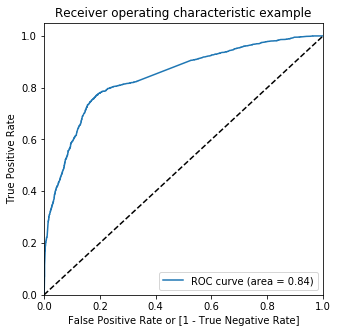

In [132]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- The ROC Curve should be a value close to 1. We are getting a good value of 0.84 indicating a good predictive model.

#### The ROC Curve should be a value close to 1. We are getting a good value of 0.84 indicating a good predictive model.
- Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

### Step 9: Finding optimal cut-off

In [133]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  Pros_ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.230740     3009          0    1    1    1    0    0   
1          0        0.168867     1012          0    1    1    0    0    0   
2          0        0.200235     9226          0    1    1    1    0    0   
3          1        0.690787     4750          1    1    1    1    1    1   
4          1        0.771467     7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    0    0    0  
4    1    1    1    0    0

In [134]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.448276  0.992641  0.107298
0.2   0.2  0.640687  0.905151  0.475032
0.3   0.3  0.794521  0.774734  0.806914
0.4   0.4  0.799874  0.727310  0.845327
0.5   0.5  0.787120  0.640638  0.878873
0.6   0.6  0.774366  0.551104  0.914213
0.7   0.7  0.750276  0.439084  0.945198
0.8   0.8  0.727917  0.335650  0.973624
0.9   0.9  0.691387  0.211774  0.991805


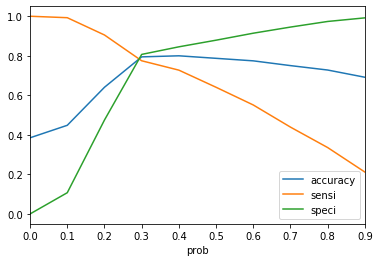

In [135]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [136]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Converted_prob  Pros_ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.230740     3009          0    1    1    1    0    0   
1          0        0.168867     1012          0    1    1    0    0    0   
2          0        0.200235     9226          0    1    1    1    0    0   
3          1        0.690787     4750          1    1    1    1    1    1   
4          1        0.771467     7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_Predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    1    1    0    0    0                1  
4    1    1    1    0    0                1

In [137]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Pros_ID','final_Predicted','Lead_Score']].head()

Converted  Converted_prob  Pros_ID  final_Predicted  Lead_Score
0          0        0.230740     3009                0          23
1          0        0.168867     1012                0          17
2          0        0.200235     9226                0          20
3          1        0.690787     4750                1          69
4          1        0.771467     7987                1          77

In [138]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted),4)*100

79.45

In [139]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3151,  754],
       [ 551, 1895]], dtype=int64)

In [140]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [141]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN),4)*100

77.47

In [142]:
# Let us calculate specificity
round(TN / float(TN+FP),4)*100

80.69

#### Observation:
##### So as we can see above the model seems to be performing well. The ROC curve has a value of 0.84, which is very good. We have the following values for the Train Data:

- Accuracy : 79.45%
- Sensitivity : 77.47%
- Specificity : 80.69%
##### Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [143]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.19308578745198463


In [144]:
# Positive predictive value 
print (TP / float(TP+FP))

0.715364288410721


In [145]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8511615343057807


### Step 10:  Precision and Recall

In [146]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3151,  754],
       [ 551, 1895]], dtype=int64)

### 10.1 Precision

In [147]:

TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.715364288410721

### 10.2 Recall

In [148]:

TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7747342600163533

###  10.3 Using sklearn utilities finding precision and recall

In [149]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.715364288410721

In [150]:
from sklearn.metrics import recall_score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7747342600163533

### 10.4 Precision and recall tradeoff

In [151]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

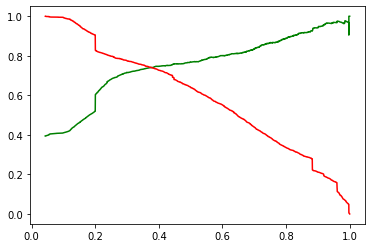

In [152]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [153]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
3271     -0.292645     0.200018                    -0.600595   
1490     -0.292645     0.508645                     1.887326   
7936     -0.292645    -0.417238                    -0.752879   
4216     -0.292645    -1.034493                    -0.888650   
3830     -0.292645     1.434528                    -0.587751   

      Page Views Per Visit  A free copy of Mastering The Interview  \
3271              0.828532                               -0.678728   
1490              1.331447                                1.473344   
7936             -0.177298                               -0.678728   
4216             -1.183128                               -0.678728   
3830              2.840192                                1.473344   

      Lead Origin_API  Lead Origin_Landing Page Submission  \
3271                1                                    0   
1490                0                                    1   
7936                1                                    0   
4216                0                                    0   
3830                0                                    1   

      Lead Origin_Lead Add Form  Lead Source_Direct Traffic  \
3271                          0                           0   
1490                          0                           1   
7936                          0                           0   
4216                          1                           0   
3830                          0                           0   

      Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
3271                   1                       0                           0   
1490                   0                       0                           0   
7936                   1                       0                           0   
4216                   0                       0                           0   
3830                   0                       0                           1   

      Specialization_Managament  Specialization_Not_specialized  \
3271                          0                               1   
1490                          0                               0   
7936                          0                               1   
4216                          0                               0   
3830                          1                               0   

      What is your current occupation_Businessman  \
3271                                            0   
1490                                            0   
7936                                            0   
4216                                            0   
3830                                            0   

      What is your current occupation_Housewife  \
3271                                          0   
1490                                          0   
7936                                          0   
4216                                          0   
3830                                          0   

      What is your current occupation_Student  \
3271                                        0   
1490                                        0   
7936                                        0   
4216                                        1   
3830                                        0   

      What is your current occupation_Unemployed  \
3271                                           1   
1490                                           0   
7936                                           1   
4216                                           0   
3830                                           1   

      What is your current occupation_Working Professional  City_Mumbai  \
3271                                                  0               1   
1490                                                  1               1   
7936                                                  0               1   
4216                          

In [154]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  \
3271     -0.292645                    -0.600595   
1490     -0.292645                     1.887326   
7936     -0.292645                    -0.752879   
4216     -0.292645                    -0.888650   
3830     -0.292645                    -0.587751   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3271                                    0                          0   
1490                                    1                          0   
7936                                    0                          0   
4216                                    0                          1   
3830                                    1                          0   

      Lead Source_Olark Chat  Specialization_Not_specialized  \
3271                       0                               1   
1490                       0                               0   
7936                       0                               1   
4216                       0                               0   
3830                       0                               0   

      What is your current occupation_Student  \
3271                                        0   
1490                                        0   
7936                                        0   
4216                                        1   
3830                                        0   

      What is your current occupation_Working Professional  City_Mumbai  
3271                                                  0               1  
1490                                                  1               1  
7936                                                  0               1  
4216                                                  0               1  
3830                                                  0               0

In [155]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions

In [156]:
y_test_pred = res.predict(X_test_sm)

In [157]:
y_test_pred[:10]

3271    0.130114
1490    0.975810
7936    0.112255
4216    0.967208
3830    0.160179
1800    0.691715
6507    0.150879
4821    0.352362
4223    0.882165
4714    0.200235
dtype: float64

In [158]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [159]:
# Let's see the head
y_pred_1.head()

0
3271  0.130114
1490  0.975810
7936  0.112255
4216  0.967208
3830  0.160179

In [160]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [161]:
# Putting Pros_ID to index
y_test_df['Pros_ID'] = y_test_df.index

In [162]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [163]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [164]:
y_pred_final.head()

Converted  Pros_ID         0
0          0     3271  0.130114
1          1     1490  0.975810
2          0     7936  0.112255
3          1     4216  0.967208
4          0     3830  0.160179

In [165]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final

Converted  Pros_ID  Converted_prob
0             0     3271        0.130114
1             1     1490        0.975810
2             0     7936        0.112255
3             1     4216        0.967208
4             0     3830        0.160179
...         ...      ...             ...
2718          0      850        0.418255
2719          0     2879        0.306697
2720          1     6501        0.713012
2721          0     7155        0.279566
2722          0      376        0.221883

[2723 rows x 3 columns]

In [166]:
# Rearranging the columns
y_pred_final = y_pred_final[['Pros_ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))


In [167]:
# Let's see the head of y_pred_final
y_pred_final.head()

Pros_ID  Converted  Converted_prob  Lead_Score
0     3271          0        0.130114          13
1     1490          1        0.975810          98
2     7936          0        0.112255          11
3     4216          1        0.967208          97
4     3830          0        0.160179          16

In [168]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [169]:
y_pred_final.head()

Pros_ID  Converted  Converted_prob  Lead_Score  final_Predicted
0     3271          0        0.130114          13                0
1     1490          1        0.975810          98                1
2     7936          0        0.112255          11                0
3     4216          1        0.967208          97                1
4     3830          0        0.160179          16                0

In [170]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted),4)*100

79.73

In [171]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1404,  330],
       [ 222,  767]], dtype=int64)

In [172]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [173]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN),4)*100

77.55

In [174]:
# Let us calculate specificity
round(TN / float(TN+FP),4)*100

80.97

In [175]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.699179580674567

In [176]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.775530839231547

#### Observation:
##### After running the model on the Test Data these are the figures we obtain:

- Accuracy : 80.02%
- Sensitivity : 77.76%
- Specificity : 81.31%

### Final Observation:

##### Train Data: 
- Accuracy : 79.45%
- Sensitivity : 77.47%
- Specificity : 80.69%
##### Test Data: 
- Accuracy : 80.02%
- Sensitivity : 77.76%
- Specificity : 81.31%


# Conclusion

Valuable Insights -
 - The Accuracy, Precision and Recall score we got from test set in aceptable range.
 - Metrics for both train and test data are almost same.This means are that our model is table and performing well.
 - We have high recall score than precision score which we were exactly looking for.
 - In business terms, this model has an ability to adjust with the company’s requirements in coming future.
 - Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
    - **Lead Origin_Lead Add Form**
    - **What is your current occupation_Working Professional** and
    - **Lead Source_Olark Chat**
    - **Total Time Spent on Website**